# About Dataset
Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, 
cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health 
Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD 
deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to
a heart attack has been constructed.

The main purpose here is to collect characteristics of Heart Attack or factors that contribute to it.
The size of the dataset is 1319 samples, which have nine fields, where eight fields are for input fields and one field 
for an output field. Age, gender, heart rate (impulse), systolic BP (pressurehight), diastolic BP (pressurelow), 
blood sugar(glucose), CK-MB (kcm), and Test-Troponin (troponin) are representing the input fields, while the output 
field pertains to the presence of heart attack (class), which is divided into two categories (negative and positive); 
negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import  tree
from sklearn. tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,r2_score,mean_squared_error

In [2]:
def read_data():
    data=pd.read_csv(r"C:\Users\dell\Downloads\Heart Attack.csv")
    return data
data = read_data()

# Basic info about Data

In [3]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


In [5]:
print(data.dtypes)

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object


In [6]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
print(data.shape)

(1319, 9)


In [8]:
print(data.isnull().sum())

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [9]:
[features for features in data.columns if data[features].isnull().sum()>0]

[]

In [10]:
print(data.duplicated().sum())

0


In [11]:
print(data.nunique())

age               75
gender             2
impluse           79
pressurehight    116
pressurelow       73
glucose          244
kcm              700
troponin         352
class              2
dtype: int64


In [12]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [13]:
#plt.figure(figsize=(12,6))
data['gender'].value_counts()             ## 1 For male and 0 for female

1    870
0    449
Name: gender, dtype: int64

In [14]:
data['class'].value_counts()

positive    810
negative    509
Name: class, dtype: int64

# EDA

<Axes: xlabel='class', ylabel='gender'>

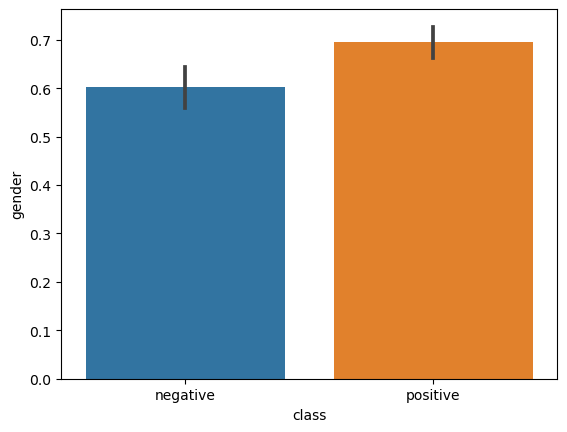

In [15]:
sns.barplot(x='class',y='gender',data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

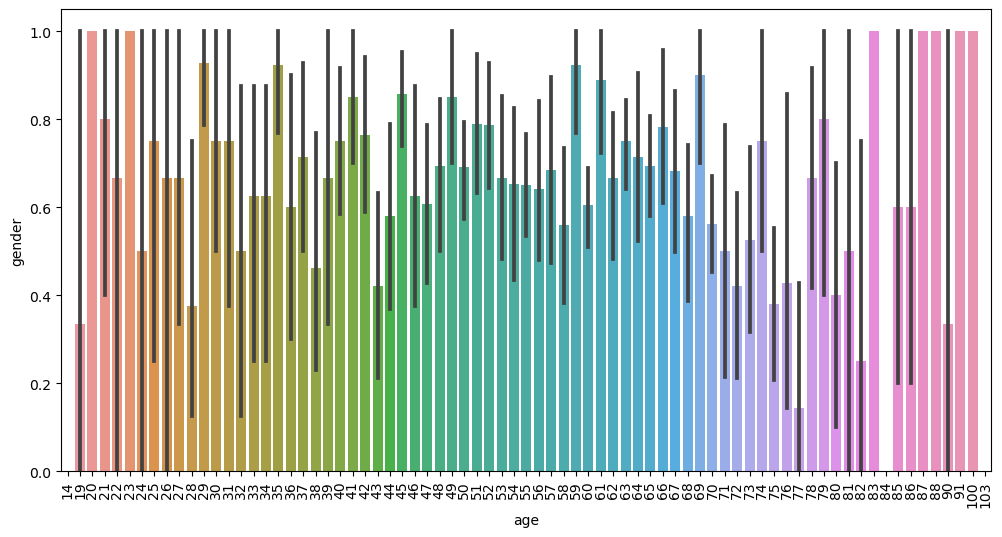

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='gender',data=data)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

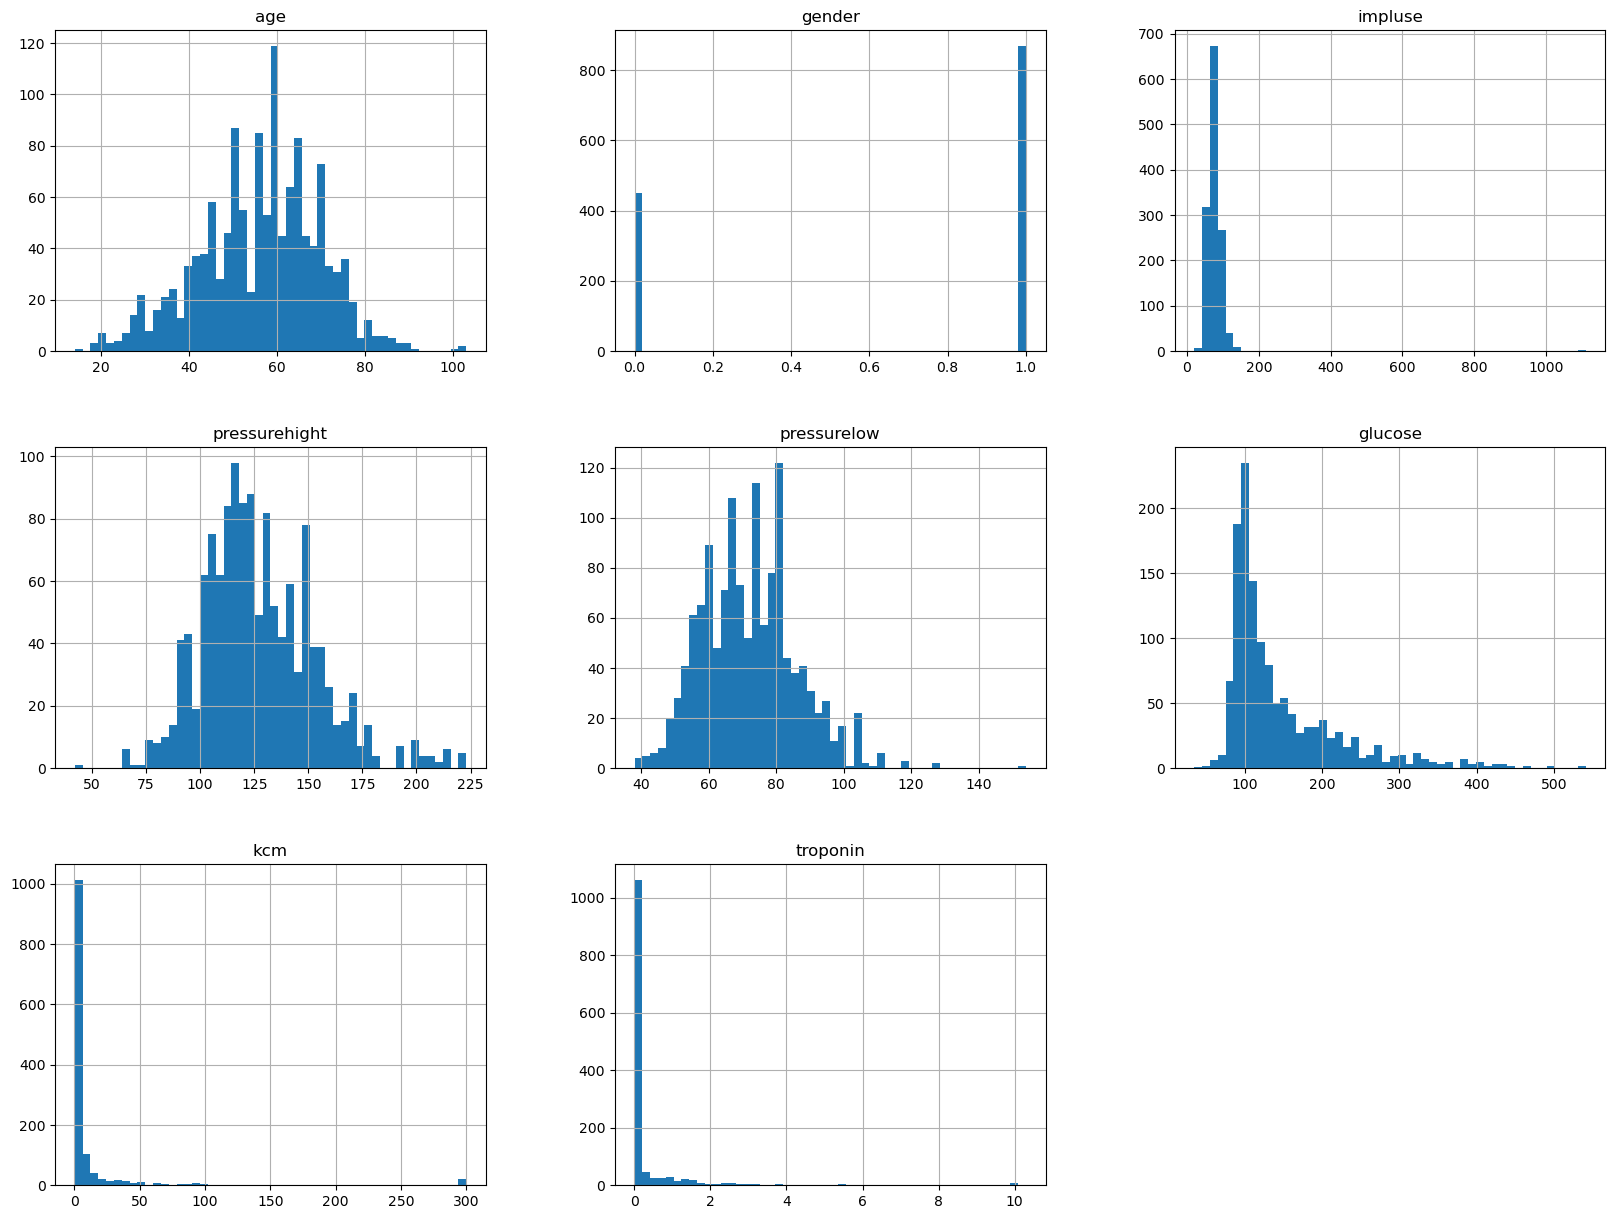

In [17]:
plt.figure(figsize=(12,6))
data.hist(bins=50,figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

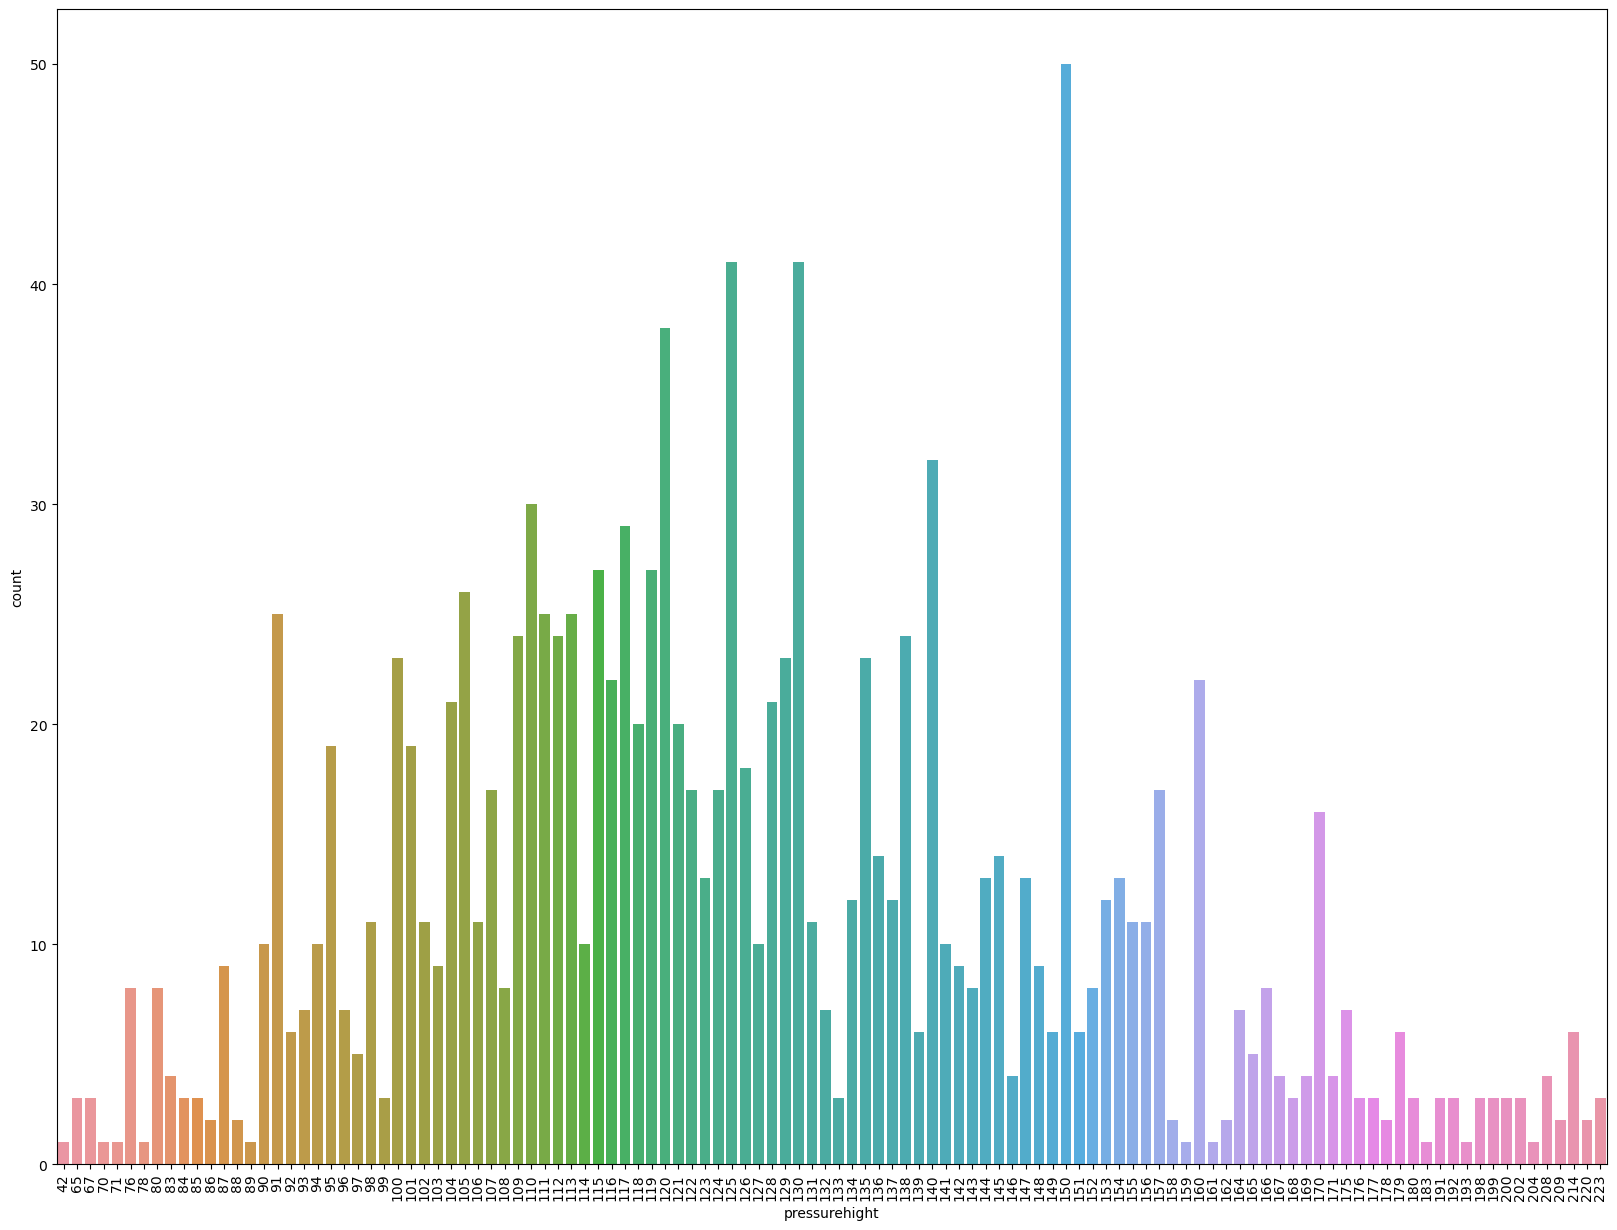

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(x='pressurehight',data=data)
plt.xticks(rotation=90)
plt.show

Text(0.5, 1.0, 'Low Pressure')

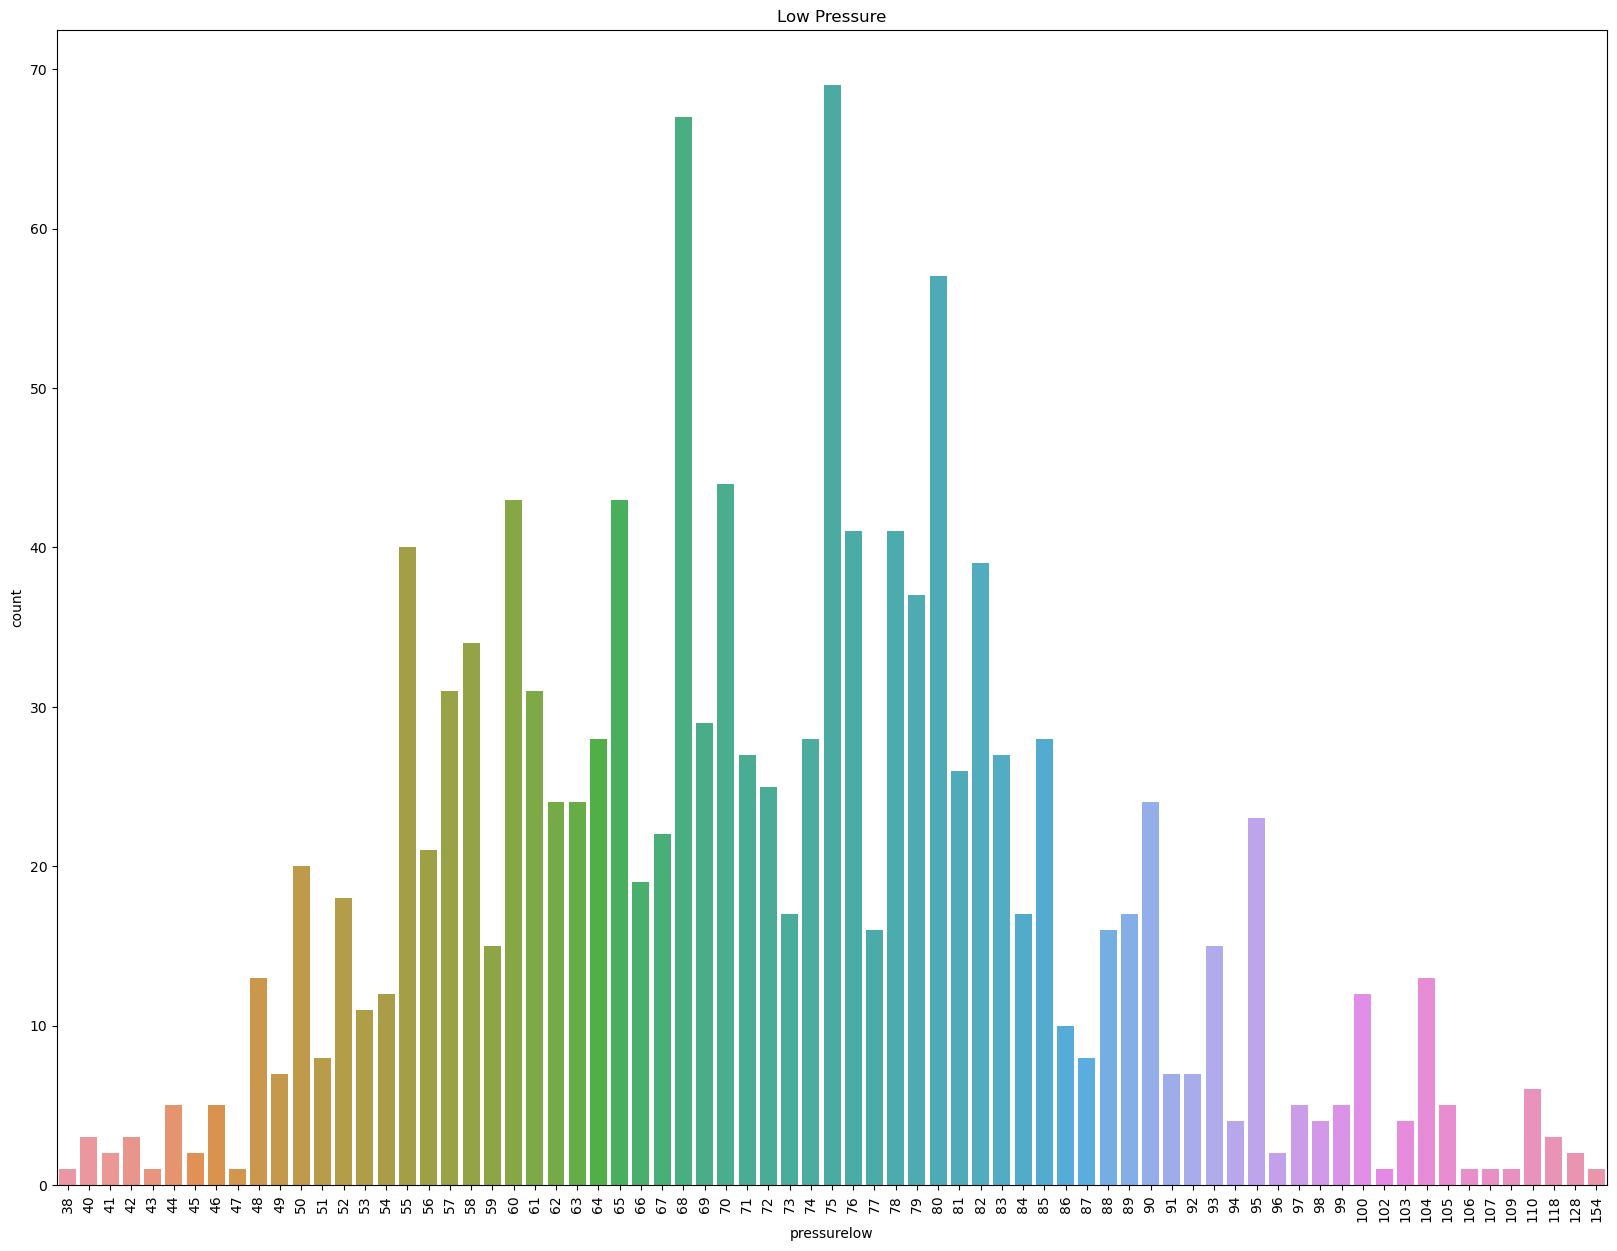

In [19]:
plt.figure(figsize=(20,15))
sns.countplot(x='pressurelow',data=data)
plt.xticks(rotation=90)
plt.show
plt.title('Low Pressure')

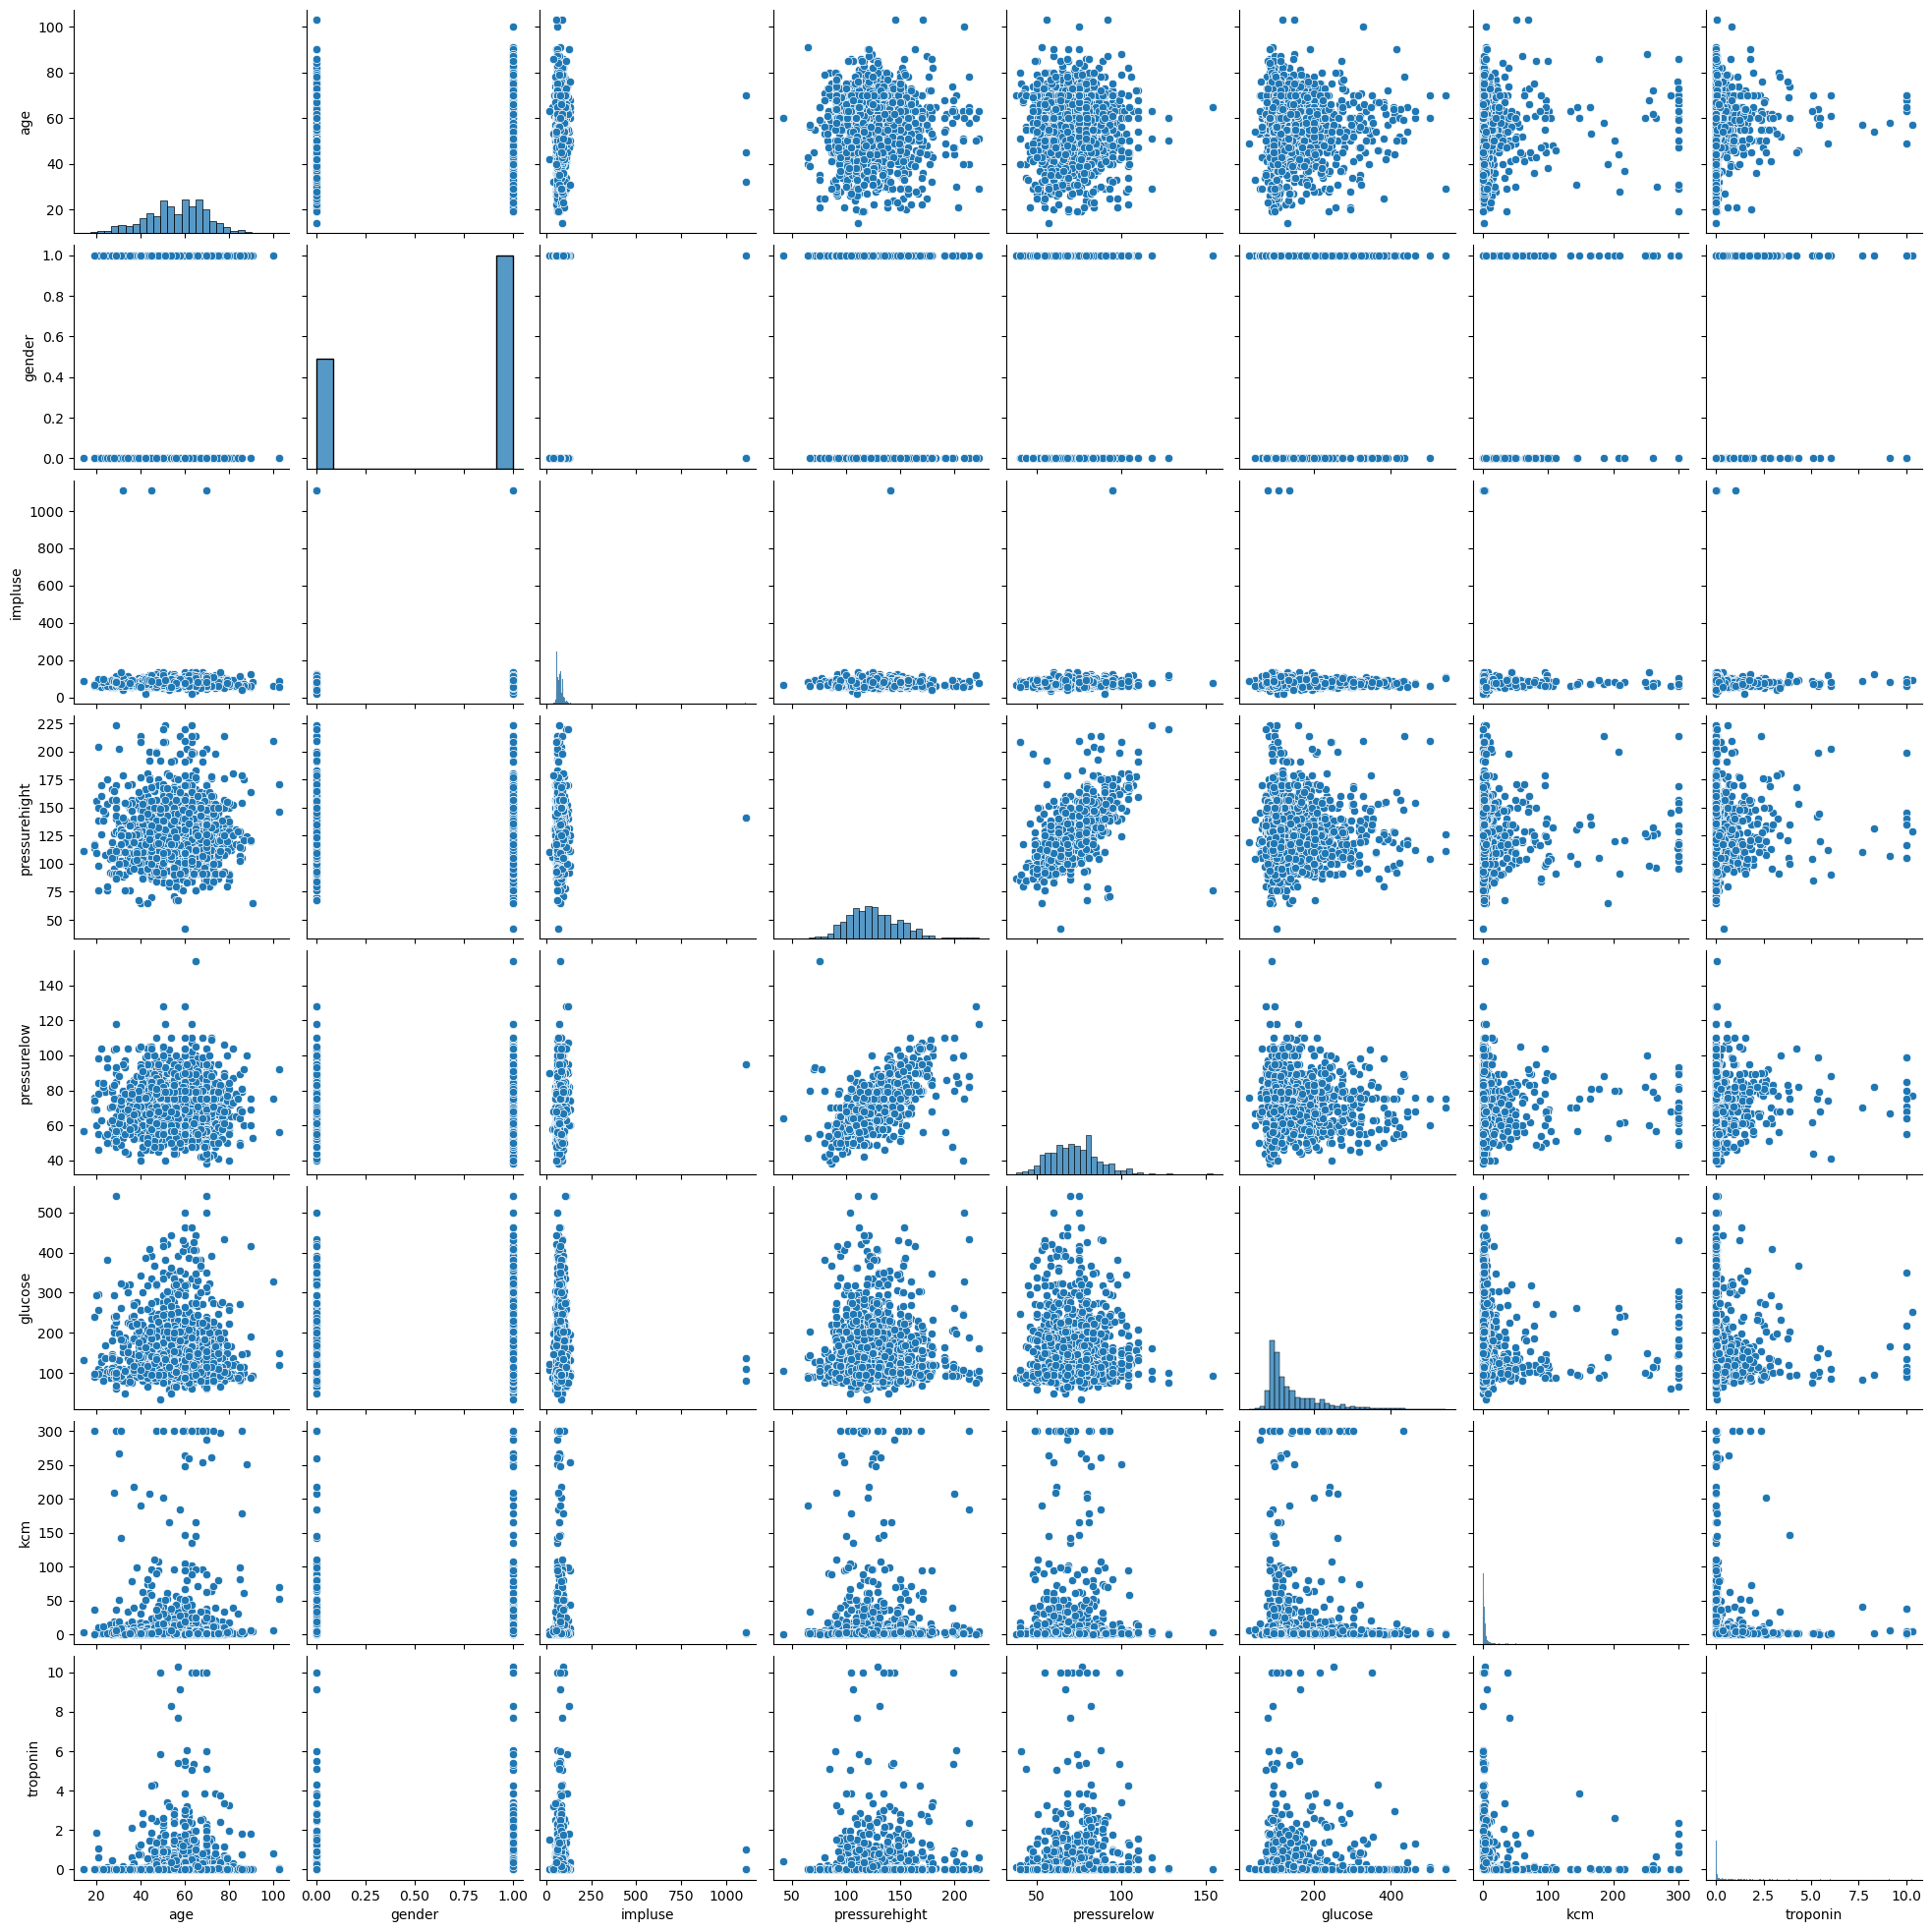

In [20]:
sns.pairplot(data)

<Axes: ylabel='kcm'>

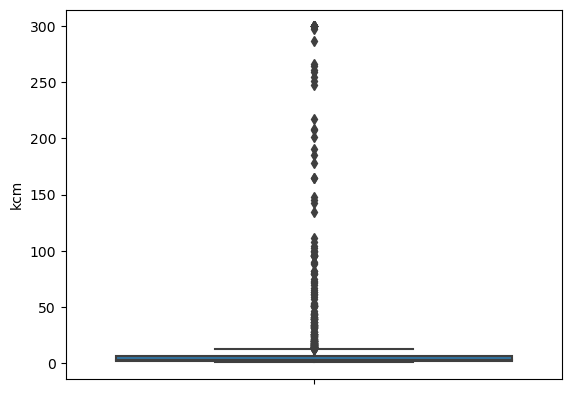

In [21]:
sns.boxplot(y='kcm',data=data)

<Axes: ylabel='glucose'>

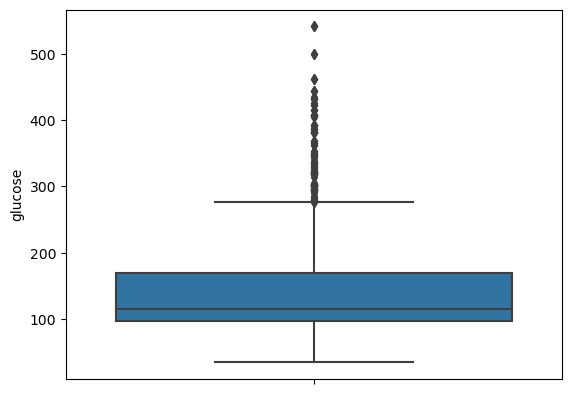

In [22]:
sns.boxplot(y='glucose',data=data)

# Features selection

In [23]:
data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_11384\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000


C:\Users\dell\AppData\Local\Temp\ipykernel_11384\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

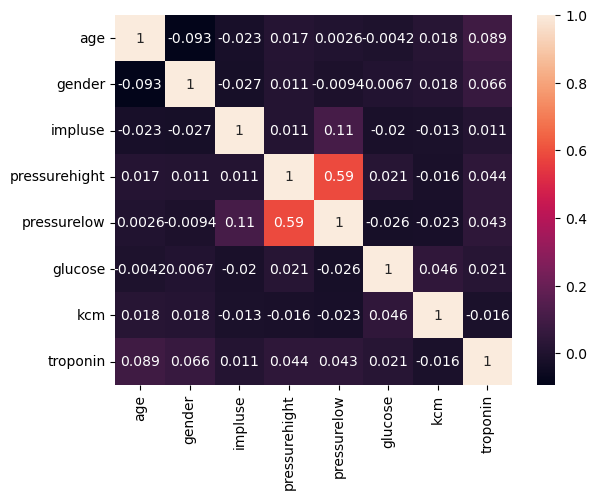

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [26]:
x = data.drop('class',axis=1)

In [27]:
y = data['class']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [29]:
model = DecisionTreeClassifier(random_state=1)

In [30]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [31]:
pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
acc = round(accuracy_score(y_test,pred)*100,2)

In [34]:
print('Accuracy of the model =',acc)

Accuracy of the model = 98.86


In [35]:
confusion_matrix(y_test,pred)

array([[100,   3],
       [  0, 161]], dtype=int64)

<Axes: >

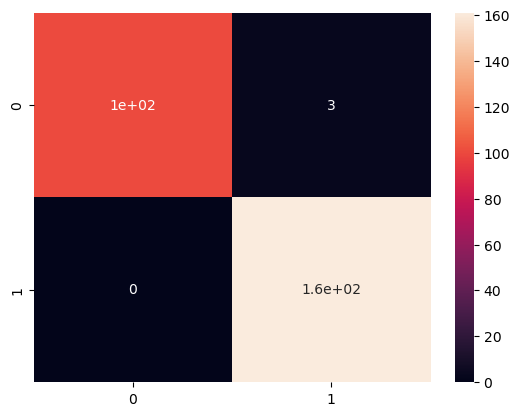

In [36]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)